Many times after we trained a model we want to save it for later use. From the previous notebook, we've already saved the model, now let's load the model and start to use it and make some test/evaluation plots. 

In [ ]:
import numpy as np
import itertools
import keras
from keras.models import load_model
from keras.datasets import mnist
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# we load the model we stored
model = load_model('my_model.h5')

Note that, we still need to prepare the data to the correct input format, and do exactly the same pre-processing steps we took before.

In [4]:
# load data, and they are saving to the training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images into 1D array
x_test = x_test.reshape(10000, 784)

# Convert the data type from int to float
x_test = x_test.astype('float32')

# Normalize the data by dividing the maximum value
x_test /= 255

num_classes = 10
# convert class vectors to binary class matrices
y_test_oneHot = keras.utils.to_categorical(y_test, num_classes)

## Visualize the test results
To evaluate the results, we will plot the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). 

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    fig = plt.figure(figsize=(8, 8)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[2.9565838e-29 1.7854849e-28 5.9027709e-21 ... 1.0000000e+00
  3.4865938e-28 4.2702217e-19]
 [0.0000000e+00 7.4600866e-23 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [5.8390390e-19 1.0000000e+00 2.8847116e-12 ... 6.0215201e-11
  6.4758084e-13 2.0946719e-19]
 ...
 [1.4869882e-35 2.7280903e-21 6.4648563e-26 ... 1.1049099e-19
  2.9240394e-18 1.6535956e-16]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  2.5319330e-20 0.0000000e+00]
 [1.4856728e-35 0.0000000e+00 7.3949798e-37 ... 0.0000000e+00
  4.5261741e-36 1.7818967e-38]]
[7 2 1 ... 4 5 6]


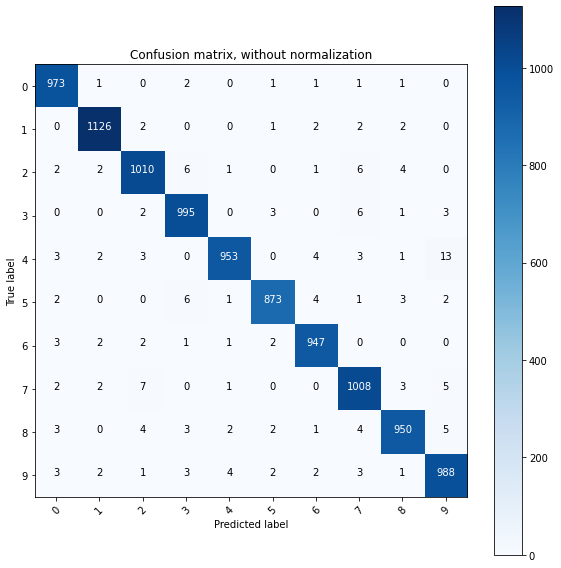

In [8]:
# predict results from the test data
predicted = model.predict(x_test) # gives you a bunch of 10-entry vectors with class activation scores in each index location
print(predicted)
predicted = np.argmax(predicted, axis=1) # searches your 10-entry vector for the location where the class activation is highest (e.g., index 2, index 7)
print(predicted)

# plot the confusion matrix
cm = confusion_matrix(y_test,predicted)

plot_confusion_matrix(cm, classes=np.unique(y_test),
                      title='Confusion matrix, without normalization')

The x axis is the predicted digit from the model, and the y axis is the true digit. The diagonal represents the correct results, we can see most of the digits we can estimate correctly. If we look at the first row, the off-diagonal number represents how many digits we estimate wrong for the digit 0, if there is 1 at the 6th column, this means that we classify one 0 digit to 5.

## Visualize the test results  

Let's visualize the first 64 digits in the test data. The green or the red digits at the left bottom corner are our estimation from the model. Green means we correctly classified the data, and red indicates the model did wrong. 

In [13]:
expected = y_test 
fig = plt.figure(figsize=(8, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in np.arange(900,963):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test.reshape(-1, 28, 28)[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

TypeError: unsupported operand type(s) for -: 'list' and 'int'